In [65]:
# import the necessary libraries
import nltk
import json
import pandas
from datetime import datetime
import plotly.express as px
import transformers

In [66]:
natalismPosts = pandas.read_json('/Volumes/scratch/hpc/r_natalism_posts.jsonl', lines=True)


natalismComments = pandas.read_json('/Volumes/scratch/hpc/r_natalism_comments.jsonl', lines=True)




In [67]:

natalismComments.head()


,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,top_awarded_type,comment_type,collapsed_reason_code,retrieved_utc,author_is_blocked,unrepliable_reason,editable,_meta,created,body_sha1
0,1.0,[deleted],NaN,NaN,[deleted],0,1354486215,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,SammyD1st,NaN,NaN,Whoops... didn't mean for that to be a self po...,0,1354487261,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,SammyD1st,NaN,NaN,I thought this was funny.,0,1354488213,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Jest2,NaN,NaN,I gathered it was a debate on the morality of ...,0,1354916271,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,SammyD1st,NaN,NaN,"Yup, I agree.\n\nWith some bonus jive-talking.",0,1354985956,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
natalismPosts.head()


,author,author_flair_css_class,author_flair_text,banned_by,created_utc,distinguished,domain,downs,edited,gilded,...,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,author_cakeday,poll_data,call_to_action,author_is_blocked,_meta,previous_selftext
0,SammyD1st,None,None,NaN,1354485197,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SammyD1st,None,None,NaN,1354485313,None,nytimes.com,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[deleted],None,None,NaN,1354485677,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[deleted],None,None,NaN,1354485909,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[deleted],None,None,NaN,1354486320,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
natalismPosts['created_utc'] 


0       1354485197
1       1354485313
2       1354485677
3       1354485909
4       1354486320
           ...    
8338    1762379964
8339    1762393143
8340    1762397236
8341    1762449560
8342    1762491838
Name: created_utc, Length: 8343, dtype: int64

In [70]:
## Dates and Times refactoring
### add full dates and times to the data frame
natalismPosts["created_utc_datetime_full"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True)
natalismComments["created_utc_datetime_full"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True)

### add time only to the data frame
natalismPosts["created_utc_datetime_times"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True).dt.time
natalismComments["created_utc_datetime_times"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True).dt.time


### add dates only to the data frame
natalismPosts["created_utc_datetime_dates"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True).dt.date
natalismComments["created_utc_datetime_dates"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True).dt.date


In [71]:
## post frequency
## We see that the posts happen around the election, and innauguration day of President Trump's second term
natalismPosts["created_utc_datetime_dates"].value_counts().head(20)

created_utc_datetime_dates
2024-07-23    23
2024-05-28    21
2024-07-26    20
2025-01-15    18
2024-12-19    18
2024-04-28    17
2024-07-30    17
2024-07-27    17
2025-01-16    16
2025-01-06    15
2024-12-29    15
2025-01-17    15
2024-04-23    14
2025-01-03    14
2024-09-29    14
2024-09-28    14
2025-01-13    14
2024-08-24    14
2024-07-24    14
2025-01-12    14
Name: count, dtype: int64

In [72]:
## We see very similar patterns in the comments
natalismComments["created_utc_datetime_dates"].value_counts().head(20)

created_utc_datetime_dates
2025-01-15    3448
2025-01-16    2435
2025-01-25    2366
2024-08-21    2271
2024-12-30    2236
2024-07-25    2195
2025-01-11    2165
2024-07-23    2151
2024-07-26    2142
2024-11-19    2133
2025-01-12    1997
2025-01-10    1995
2025-01-13    1951
2025-01-14    1941
2024-07-18    1922
2024-07-27    1831
2025-01-09    1806
2025-01-26    1752
2024-10-04    1671
2025-01-17    1668
Name: count, dtype: int64

<Axes: xlabel='created_utc_datetime_dates'>

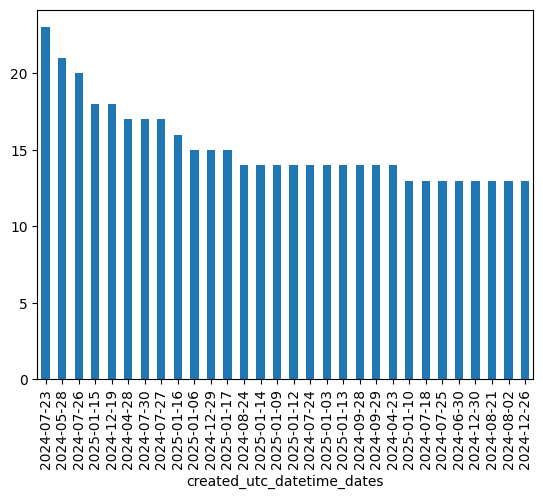

In [73]:
postDatesFreq = natalismPosts["created_utc_datetime_dates"].value_counts()
commentDatesFreq = natalismComments["created_utc_datetime_dates"].value_counts()

#postDatesFreq.plot(kind='bar')
#postDatesFreq.head(30).plot(kind='bar')
postDatesFreq.sort_values(ascending=False).head(30).plot(kind='bar')

<Axes: xlabel='created_utc_datetime_dates'>

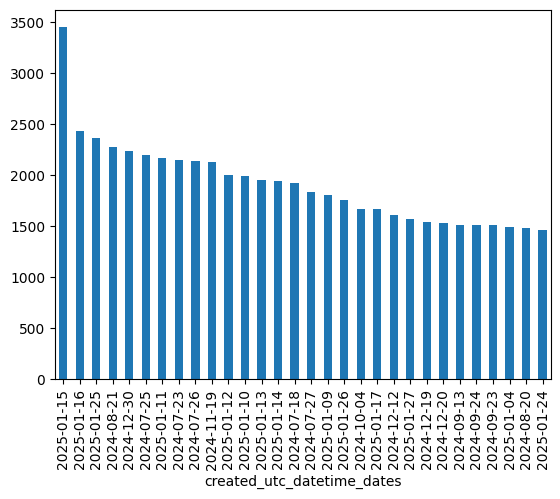

In [74]:
commentDatesFreq.head(30).plot(kind='bar')

In [75]:
## Interactive Plotly visualization for post dates
### Sort by date for chronological view
### Black BG, Red FG, Text, and Lines

postDatesFreq_sorted = natalismPosts["created_utc_datetime_dates"].value_counts().sort_index()

fig = px.bar(
    x=postDatesFreq_sorted.index,
    y=postDatesFreq_sorted.values,
    labels={'x': 'Date', 'y': 'Number of Posts'},
    title='r/Natalism Post Frequency Over Time',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Posts",
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds a range slider for easy navigation
        type="date"
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="Date: %{x}<br>Posts: %{y}<extra></extra>"
)

fig.show()


In [76]:
## Interactive Plotly visualization for comment dates
### Sort by date for chronological view
### Black BG, Red FG, Text, and Lines

commentDatesFreq_sorted = natalismComments["created_utc_datetime_dates"].value_counts().sort_index()

fig = px.bar(
    x=commentDatesFreq_sorted.index,
    y=commentDatesFreq_sorted.values,
    labels={'x': 'Date', 'y': 'Number of Comments'},
    title='r/Natalism Comment Frequency Over Time',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Comments",
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds a range slider for easy navigation
        type="date"
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="Date: %{x}<br>Comments: %{y}<extra></extra>"
)

fig.show()


In [77]:
## User with most posts

natalismPosts['author'].value_counts().head(10)




author
SammyD1st           1937
dissolutewastrel     703
[deleted]            685
Salami_Slicer        134
DaphneDK42           113
Dan_Ben646            76
userforums            73
CMVB                  63
bioideology           62
Monkey_Paralysed      62
Name: count, dtype: int64

In [78]:
## User with most comments

natalismComments['author'].value_counts().head(10)


author
[deleted]            6941
CMVB                 3069
SammyD1st            2755
BO978051156          2034
Visible_whisperer    1649
Dan_Ben646           1440
Ok-Hunt7450          1051
goyafrau              998
Sapiescent            838
NoMoreNicksLeft       788
Name: count, dtype: int64

In [79]:
## Drop deleted users

natalismPosts_removed_deleted = natalismPosts[natalismPosts['author'] != '[deleted]']
natalismComments_removed_deleted = natalismComments[natalismComments['author'] != '[deleted]']




In [80]:
natalismPosts_removed_deleted['author'].value_counts().head(10)


author
SammyD1st           1937
dissolutewastrel     703
Salami_Slicer        134
DaphneDK42           113
Dan_Ben646            76
userforums            73
CMVB                  63
Monkey_Paralysed      62
OppositeRock4217      62
bioideology           62
Name: count, dtype: int64

In [81]:
natalismComments_removed_deleted['author'].value_counts().head(10)

author
CMVB                    3069
SammyD1st               2755
BO978051156             2034
Visible_whisperer       1649
Dan_Ben646              1440
Ok-Hunt7450             1051
goyafrau                 998
Sapiescent               838
NoMoreNicksLeft          788
NearbyTechnology8444     757
Name: count, dtype: int64

In [82]:
post_counts_by_user = natalismPosts_removed_deleted['author'].value_counts().sort_index()

fig = px.bar(
    x=post_counts_by_user.index,
    y=post_counts_by_user.values,
    labels={'x': 'User', 'y': 'Number of Posts'},
    title='r/Natalism Top Posters (Excluding Deleted Users)',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="User",
    yaxis_title="Number of Posts",
    xaxis=dict(
        tickangle=45  # Angle labels for readability
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="User: %{x}<br>Posts: %{y}<extra></extra>"
)

fig.show()


In [83]:
# Interactive Plotly bar graph for comments per user
# Using natalismComments_removed_deleted (excludes [deleted] users)

comment_counts_by_user = natalismComments_removed_deleted['author'].value_counts().sort_index()

fig = px.bar(
    x=comment_counts_by_user.index,
    y=comment_counts_by_user.values,
    labels={'x': 'User', 'y': 'Number of Comments'},
    title='r/Natalism Top Commenters (Excluding Deleted Users)',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="User",
    yaxis_title="Number of Comments",
    xaxis=dict(
        tickangle=45  # Angle labels for readability
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="User: %{x}<br>Comments: %{y}<extra></extra>"
)

fig.show()


In [84]:
#natalismPosts["title" ].value_counts().head(20).sort_values(ascending=False)

#natalismPosts["title" != "title"]
cleanedTitles = natalismPosts[(natalismPosts['title'] != '[deleted]') & (natalismPosts['title'] != '[deleted by user]') & (natalismPosts['title'] != '[image processing failed]')]

cleanedTitles["title" ].value_counts().head(20).sort_values(ascending=False)

title
Just a joke                                                                                                                                                                6
Where's the lie?                                                                                                                                                           5
Stop being happy                                                                                                                                                           4
FUCK NATALISTS                                                                                                                                                             4
Americans' Preference for Larger Families Highest Since 1971                                                                                                               4
Thoughts on this?                                                                                                                

In [85]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

In [86]:
from transformers import pipeline

sentences = []

for _str in cleanedTitles["title"]:
    sentences.append(_str)
    #print(_str)

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

model_outputs = classifier(sentences)
print(model_outputs[0])


Device set to use mps:0


[{'label': 'neutral', 'score': 0.9653739333152771}, {'label': 'approval', 'score': 0.011827914044260979}, {'label': 'annoyance', 'score': 0.008036813698709011}, {'label': 'realization', 'score': 0.00734848715364933}, {'label': 'disapproval', 'score': 0.003908322658389807}, {'label': 'disappointment', 'score': 0.0032604001462459564}, {'label': 'anger', 'score': 0.0028166319243609905}, {'label': 'confusion', 'score': 0.002732569817453623}, {'label': 'admiration', 'score': 0.0024997531436383724}, {'label': 'amusement', 'score': 0.0023935316130518913}, {'label': 'sadness', 'score': 0.0023719684686511755}, {'label': 'disgust', 'score': 0.0022091474384069443}, {'label': 'optimism', 'score': 0.0018949393415823579}, {'label': 'excitement', 'score': 0.0018837585812434554}, {'label': 'joy', 'score': 0.0015889625065028667}, {'label': 'curiosity', 'score': 0.0015192978316918015}, {'label': 'fear', 'score': 0.0014650262892246246}, {'label': 'surprise', 'score': 0.00115199142601341}, {'label': 'grat

In [87]:
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task(sentences)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'label': 'neutral', 'score': 0.819005012512207},
 {'label': 'neutral', 'score': 0.5980987548828125},
 {'label': 'positive', 'score': 0.6829580068588257},
 {'label': 'negative', 'score': 0.95014888048172},
 {'label': 'neutral', 'score': 0.9139797687530518},
 {'label': 'neutral', 'score': 0.8176804184913635},
 {'label': 'positive', 'score': 0.710379958152771},
 {'label': 'neutral', 'score': 0.9118860960006714},
 {'label': 'neutral', 'score': 0.7793083190917969},
 {'label': 'negative', 'score': 0.9337606430053711},
 {'label': 'neutral', 'score': 0.5015403032302856},
 {'label': 'neutral', 'score': 0.7715938091278076},
 {'label': 'neutral', 'score': 0.5205304026603699},
 {'label': 'neutral', 'score': 0.936847984790802},
 {'label': 'neutral', 'score': 0.9287437796592712},
 {'label': 'neutral', 'score': 0.621759831905365},
 {'label': 'negative', 'score': 0.6193269491195679},
 {'label': 'neutral', 'score': 0.8845636248588562},
 {'label': 'negative', 'score': 0.7296046018600464},
 {'label': '

In [88]:
from bertopic import BERTopic

In [89]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(sentences)

In [90]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2284,-1_the_and_of_to,"[the, and, of, to, you, is, for, what, this, k...",[What do you do if your child says they wish y...
1,0,682,0_fertility_rates_rate_us,"[fertility, rates, rate, us, in, low, marriage...",[United States TFR estimates by state and race...
2,1,330,1_birth_rates_birthrates_falling,"[birth, rates, birthrates, falling, rate, low,...",[What is actually the reason birth rates are f...
3,2,220,2_japan_japans_japanese_population,"[japan, japans, japanese, population, record, ...","[Can Japan change its demographic future?, Can..."
4,3,201,3_kids_having_have_want,"[kids, having, have, want, dont, children, peo...",[Why Do So Many People Not Want To Have Childr...
...,...,...,...,...,...
125,124,11,124_utah_utahs_secondfastest_29,"[utah, utahs, secondfastest, 29, state, nation...",[The fertility rate in Utah and the nation con...
126,125,10,125_trolls_ban_banned_yikes,"[trolls, ban, banned, yikes, roverpopulation, ...","[Yikes! The trolls on this forum!, I hate aski..."
127,126,10,126_voting_proxy_vote_demeny,"[voting, proxy, vote, demeny, parents, give, p...",[2 mothers bring the House to a halt over push...
128,127,10,127_bryan_caplans_book_selfish,"[bryan, caplans, book, selfish, caplan, fun, r...",[I found Bryan Caplans book Selfish Reasons to...


In [91]:
topic_model.get_topic(0)

[('fertility', np.float64(0.03974306366169008)),
 ('rates', np.float64(0.014284804882228355)),
 ('rate', np.float64(0.014078016645264054)),
 ('us', np.float64(0.010006547120437696)),
 ('in', np.float64(0.009388427629335517)),
 ('low', np.float64(0.008703661977196008)),
 ('marriage', np.float64(0.00852159848157981)),
 ('and', np.float64(0.007835662072676691)),
 ('the', np.float64(0.007782012927918997)),
 ('total', np.float64(0.007530371841607019))]

In [92]:
natalismComments["body"].head(10)

0                                            [deleted]
1    Whoops... didn't mean for that to be a self po...
2                            I thought this was funny.
3    I gathered it was a debate on the morality of ...
4       Yup, I agree.\n\nWith some bonus jive-talking.
5    gfgdhfgfnfghfbvbgjjffbfhghdjhrgfrhrgfrhfrghfrc...
6    This is a wonderful journal, that includes bot...
7    I don't think pro-natalist necessarily means p...
8    This is the Professor's draft version.\n\nThe ...
9    This is a really good one, I may have to post ...
Name: body, dtype: object

In [93]:
cleanedCommentBodies = natalismComments[(natalismComments['body'] != '[deleted]') & (natalismComments['body'] != '[deleted by user]') & (natalismComments['body'] != '[image processing failed]')]


In [94]:
cleanedCommentBodies["body"].head(10)

1     Whoops... didn't mean for that to be a self po...
2                             I thought this was funny.
3     I gathered it was a debate on the morality of ...
4        Yup, I agree.\n\nWith some bonus jive-talking.
5     gfgdhfgfnfghfbvbgjjffbfhghdjhrgfrhrgfrhfrghfrc...
6     This is a wonderful journal, that includes bot...
7     I don't think pro-natalist necessarily means p...
8     This is the Professor's draft version.\n\nThe ...
9     This is a really good one, I may have to post ...
10    I posted this because the comments include som...
Name: body, dtype: object

In [95]:
cleanedCommentCorpusList = []
for _str in cleanedCommentBodies["body"]:
    cleanedCommentCorpusList.append(_str)

cleanedCommentTopicModel = BERTopic()
topics, probs = cleanedCommentTopicModel.fit_transform(cleanedCommentCorpusList)

In [96]:
cleanedCommentTopicModel.get_topic_info()
#cleanedCommentTopicModel.get_topic(0)



,Topic,Count,Name,Representation,Representative_Docs
0,-1,160292,-1_life_and_to_kids,"[life, and, to, kids, we, my, children, have, ...","[I think that’s certainly part of it, but of c..."
1,0,4252,0_religion_religious_church_catholic,"[religion, religious, church, catholic, christ...","[Are you religious?, Religion., It’s about rel..."
2,1,2888,1_removed_leaving_here_no,"[removed, leaving, here, no, this, , , , , ]","[[removed], [removed], [removed]]"
3,2,2612,2_immigrants_immigration_immigrant_native,"[immigrants, immigration, immigrant, native, m...","[Or on immigration., Immigrants., Immigration.]"
4,3,1883,3_israel_jews_israeli_jewish,"[israel, jews, israeli, jewish, orthodox, secu...",[Secular women have a birth rate of 2.0 in Isr...
...,...,...,...,...,...
1969,1968,10,1968_aboutare_method_faraday_pull,"[aboutare, method, faraday, pull, invention, p...",[People used pull out method historically but ...
1970,1969,10,1969_hitchens_omfg_claim_razor,"[hitchens, omfg, claim, razor, disputing, misr...",[Ya I thought I would give you a second opport...
1971,1970,10,1970_guerentees_wetlock_sluts_incentives,"[guerentees, wetlock, sluts, incentives, disin...","[This is true, however, one of the easiest sol..."
1972,1971,10,1971_antinatalism_nonrational_overpowering_sui...,"[antinatalism, nonrational, overpowering, suic...",[antinatalism is not derived from any kind of ...


In [97]:
cleanedCommentTopicModel.get_topic(1)

[('removed', np.float64(1.1004682790565574)),
 ('leaving', np.float64(0.0006597952549802242)),
 ('here', np.float64(0.00013714467416754827)),
 ('no', np.float64(4.8376920810737805e-05)),
 ('this', np.float64(2.725382231375571e-05)),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

In [98]:
similar_topics, similarity =cleanedCommentTopicModel.find_topics("jive", top_n=5)







In [99]:
cleanedCommentTopicModel.get_topic(similar_topics[0])

[('surejangif', np.float64(0.5521923152590925)),
 ('stfu', np.float64(0.5459463998358105)),
 ('whynotbothgif', np.float64(0.29536256546762685)),
 ('alwayswasgif', np.float64(0.16840479975144154)),
 ('gofundbaby', np.float64(0.16840479975144154)),
 ('fingerpointingupwardgif', np.float64(0.16840479975144154)),
 ('areyousureaboutthatgif', np.float64(0.16840479975144154)),
 ('disablehttpswwwredditcommessagecomposetoimagelinkerbotsubjectignore20requestmessageignore20me',
  np.float64(0.16840479975144154)),
 ('whynotbothjpghttpiimgurcomo2ycynujpg', np.float64(0.16840479975144154)),
 ('gigachadyesjpeg', np.float64(0.16840479975144154))]

In [100]:
    # Search for biopolitical themes
biopolitics_keywords = ["rates", "collapse", "decline", "census", "future", "demographics", "economy", "gdp"]

for word in biopolitics_keywords:
    topics, similarity = cleanedCommentTopicModel.find_topics(word, top_n=3)
    print(f"--- Topics for '{word}' ---")
    for topic_id in topics:
        if topic_id != -1:  # -1 is outlier topic
            print(f"Topic {topic_id}: {cleanedCommentTopicModel.get_topic(topic_id)}")







--- Topics for 'rates' ---
Topic 1588: [('ratioed', np.float64(0.16021638344196298)), ('ratio', np.float64(0.13334738360277384)), ('kd', np.float64(0.06514930209362337)), ('omegaratiod', np.float64(0.06514930209362337)), ('ratiod', np.float64(0.06009080407642581)), ('awol', np.float64(0.06009080407642581)), ('inout', np.float64(0.057132175072205194)), ('sordid', np.float64(0.05503327612628489)), ('legends', np.float64(0.05095139916773152)), ('ration', np.float64(0.04367449523390702))]
Topic 1144: [('prices', np.float64(0.04135574281825586)), ('wholesale', np.float64(0.019362633333941823)), ('price', np.float64(0.01434200453596411)), ('covid', np.float64(0.013207270454857515)), ('oil', np.float64(0.012720188658324147)), ('companies', np.float64(0.010808408323135586)), ('unchanging', np.float64(0.010768640438137356)), ('goods', np.float64(0.008594028222395769)), ('misesian', np.float64(0.008357167028863672)), ('ucmj', np.float64(0.008357167028863672))]
Topic 174: [('8020', np.float64(0.0

In [101]:
 # Filter for normative discourse
normative_terms = ["duty", "selfish", "obligation", "should", "must", "responsibility"]

normative_comments = natalismComments[
    natalismComments['body'].str.contains('|'.join(normative_terms), case=False, na=False)
]

print(f"Found {len(normative_comments)} normative comments")

# Sample a few to classify emotion
sample_bodies = normative_comments['body'].head(20).tolist()
emotion_results = classifier(sample_bodies) # Your existing pipeline

# Correlate terms with emotions
# (You can expand this to a full dataframe analysis)

Found 31602 normative comments


In [102]:
sample_bodies

['I found this part fascinating: \n\n"While there are more atheists than ever before as global population continually increases, the atheist percentage of the total population seem to be declining. This may be because birth rates in religious societies are much higher."\n\nI really don\'t think the religious should be the only ones to be pro-natalist.',
 'This here is why I think more people should be pro-natalist.  \n\nBecause currently pro-natalism comes with some unsavory ideological baggage.',
 'Phew, that was a heck of a read!\n\n> The society of man, Comte taught, must be studied in the same scientific manner as the world of nature. It is subject to basic laws just as is the rest of the cosmos\n\nI wish I was this optimistic.\n\n> It is within the family that the elementary egotistical propensities are curbed and harnessed to social purposes.\n\nThis is a very valuable point in this day and age. ',
 '> do we support gay marriage in order to support the institution of marriage or 

In [103]:
natalismComments['body'].str.contains('|'.join(normative_terms), case=False, na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
299177    False
299178    False
299179    False
299180    False
299181    False
Name: body, Length: 299182, dtype: bool

In [104]:
outsider_terms = ["black", "african", "urban", "ghetto","city"]

# Filter comments mentioning outsiders
outsider_comments = natalismComments[
    natalismComments['body'].str.contains('|'.join(outsider_terms), case=False, na=False)
]

# Run your emotion classifier on just these comments
# Hypothesis: High 'anger' or 'disgust' indicates boundary maintenance
outsider_emotions = classifier(outsider_comments['body'].head(10).tolist())

In [105]:
outsider_emotions

[[{'label': 'curiosity', 'score': 0.49512162804603577},
  {'label': 'neutral', 'score': 0.4653218388557434},
  {'label': 'confusion', 'score': 0.2980879843235016},
  {'label': 'annoyance', 'score': 0.024753186851739883},
  {'label': 'approval', 'score': 0.00642778305336833},
  {'label': 'disapproval', 'score': 0.005589180160313845},
  {'label': 'anger', 'score': 0.00531079713255167},
  {'label': 'surprise', 'score': 0.004634130280464888},
  {'label': 'realization', 'score': 0.004539151210337877},
  {'label': 'amusement', 'score': 0.0029517891816794872},
  {'label': 'disappointment', 'score': 0.002610300201922655},
  {'label': 'optimism', 'score': 0.002381319645792246},
  {'label': 'disgust', 'score': 0.0017510383622720838},
  {'label': 'caring', 'score': 0.0012172665446996689},
  {'label': 'excitement', 'score': 0.00110071268863976},
  {'label': 'admiration', 'score': 0.0010811887914314866},
  {'label': 'sadness', 'score': 0.0010051835561171174},
  {'label': 'desire', 'score': 0.000971

In [106]:
upVotesComments = natalismComments[natalismComments['ups'] > 50]
upVotesComments['ups'].head(10).sort_values(ascending=False)


upvoteOver100CorpusList = []
for _str in upVotesComments["body"]:
    upvoteOver100CorpusList.append(_str)

upvoteOver100TopicModel = BERTopic()
upvoteOver100Topics, upvoteOver100Probs = upvoteOver100TopicModel.fit_transform(upvoteOver100CorpusList)



In [107]:
upvoteOver100TopicModel.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,384,-1_the_to_and_of,"[the, to, and, of, in, is, that, have, are, it]",[I think we should also add that young people ...
1,0,164,0_and_the_to_women,"[and, the, to, women, men, of, that, are, is, in]",[I actually think women who want large familie...
2,1,96,1_to_the_is_of,"[to, the, is, of, and, that, this, as, sub, pe...",[I agree with my whole heart. I was originally...
3,2,70,2_to_and_the_of,"[to, and, the, of, pregnancy, in, was, that, i...",[It's a big part of it. \n\nI had a traumatic ...
4,3,46,3_have_to_kids_the,"[have, to, kids, the, and, want, is, of, that,...",[I’m cool with this. I don’t want teens to be ...
5,4,39,4_the_is_to_and,"[the, is, to, and, birth, that, of, for, in, p...",[The biggest myth on the topic of birth rate i...
6,5,39,5_kids_and_of_to,"[kids, and, of, to, the, that, in, they, is, are]",[There was a post here lately arguing that peo...
7,6,30,6_in_my_to_and,"[in, my, to, and, of, family, kids, the, was, ...",[One of the big shifts societally is how disco...
8,7,26,7_to_the_kids_have,"[to, the, kids, have, is, they, more, it, of, ...",[2008 is the start of the first catastrophic f...
9,8,17,8_and_to_for_daycare,"[and, to, for, daycare, is, have, of, with, on...",[Society by en large has not come to terms wit...


In [108]:
lowVotesComments = natalismComments[natalismComments['ups'] < 0]
lowVotesComments['ups'].head(10).sort_values(ascending=False)


lowVotesCorpusList = []
for _str in lowVotesComments["body"]:
    lowVotesCorpusList.append(_str)

lowVotesTopicModel = BERTopic()
lowVotesTopics, lowVotesProbs = lowVotesTopicModel.fit_transform(lowVotesCorpusList)


In [109]:
lowVotesTopicModel.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12898,-1_and_to_the_of,"[and, to, the, of, have, that, you, in, women,...",[What is the definition of sucking? The econom...
1,0,1171,0_natalism_antinatalists_antinatalist_natalist,"[natalism, antinatalists, antinatalist, natali...",[This is happening because secular natalism is...
2,1,472,1_abortion_abortions_baby_pro,"[abortion, abortions, baby, pro, killing, babi...","[Mainly, IMO because pro choice people are lin..."
3,2,429,2_home_work_women_stay,"[home, work, women, stay, men, career, chores,...",[How do you expect them to do all the labour a...
4,3,355,3_religious_religion_church_god,"[religious, religion, church, god, christian, ...",[We were literally told not to ask and to shut...
...,...,...,...,...,...
258,257,10,257_childfree_transcendental_future_contributing,"[childfree, transcendental, future, contributi...",[Agreed. It is literally sacrificing individua...
259,258,10,258_humanity_attached_please_universe,"[humanity, attached, please, universe, improba...",[What is humanities’ purpose in the universe e...
260,259,10,259_lot_boys_coaching_men,"[lot, boys, coaching, men, patriarchal, father...",[Ya I started noticing that too. XD we both c...
261,260,10,260_sad_misguided_tragic_outlook,"[sad, misguided, tragic, outlook, upon, logica...","[it's actually sad, That’s sad., Sad]"


In [110]:
lowVotesTopicModel.get_topic(0)

[('natalism', np.float64(0.013044007938816974)),
 ('antinatalists', np.float64(0.01158342299978921)),
 ('antinatalist', np.float64(0.011023229212709033)),
 ('natalist', np.float64(0.010890888395373437)),
 ('antinatalism', np.float64(0.010719746723489137)),
 ('natalists', np.float64(0.010438257017356478)),
 ('sub', np.float64(0.008711699500663292)),
 ('anti', np.float64(0.0066609076151974405)),
 ('this', np.float64(0.004562733415039706)),
 ('is', np.float64(0.004039396341067224))]

In [111]:
natalismComments[natalismComments["created_utc_datetime_dates"] == "2025-01-01"]
natalismComments["created_utc_datetime_dates"].head(10)

type(natalismComments["created_utc_datetime_dates"])




pandas.core.series.Series

In [112]:
timedCommentIndex = natalismComments.set_index('created_utc_datetime_full').sort_index()

In [113]:
myTimedCommentIndex = timedCommentIndex.loc["2025-01-15"]







In [114]:
len(myTimedCommentIndex)

3448

In [115]:

timedCommentCorpusList = []
for _str in myTimedCommentIndex["body"]:
    timedCommentCorpusList.append(_str)

timedCommentTopicModel = BERTopic()
timedCommentTopics, timedCommentProbs = timedCommentTopicModel.fit_transform(timedCommentCorpusList)




In [116]:
timedCommentTopicModel.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,0,3404,0_the_to_and_of,"[the, to, and, of, that, is, in, you, have, are]",[I guess the reason for it is because the patr...
1,1,44,1_removed_deleted__,"[removed, deleted, , , , , , , , ]","[[removed], [removed], [removed]]"


In [117]:
timedCommentTopicModel.get_topic(0)


[('the', np.float64(0.10092074321909228)),
 ('to', np.float64(0.09243083706222747)),
 ('and', np.float64(0.08138991868850451)),
 ('of', np.float64(0.06415593398769544)),
 ('that', np.float64(0.05391770410907448)),
 ('is', np.float64(0.05326490232289295)),
 ('in', np.float64(0.051802698771534844)),
 ('you', np.float64(0.047392430571838326)),
 ('have', np.float64(0.04223805218853987)),
 ('are', np.float64(0.04214258982156474))]

In [118]:
timedComments = classifier(myTimedCommentIndex['body'].head(30).tolist())







In [119]:
timedComments

[[{'label': 'approval', 'score': 0.8862895965576172},
  {'label': 'neutral', 'score': 0.11543538421392441},
  {'label': 'realization', 'score': 0.04317401349544525},
  {'label': 'optimism', 'score': 0.022281328216195107},
  {'label': 'disapproval', 'score': 0.017577409744262695},
  {'label': 'admiration', 'score': 0.009994840249419212},
  {'label': 'annoyance', 'score': 0.00955766998231411},
  {'label': 'confusion', 'score': 0.008630181662738323},
  {'label': 'disappointment', 'score': 0.006132468581199646},
  {'label': 'caring', 'score': 0.004854578524827957},
  {'label': 'love', 'score': 0.004791452549397945},
  {'label': 'relief', 'score': 0.004133200738579035},
  {'label': 'joy', 'score': 0.003944507334381342},
  {'label': 'curiosity', 'score': 0.0029909813310950994},
  {'label': 'desire', 'score': 0.0029875305481255054},
  {'label': 'gratitude', 'score': 0.002549536991864443},
  {'label': 'sadness', 'score': 0.0021643538493663073},
  {'label': 'excitement', 'score': 0.001991342753

In [120]:
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task(myTimedCommentIndex['body'].head(30).tolist())

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'label': 'neutral', 'score': 0.5975812673568726},
 {'label': 'positive', 'score': 0.7869794964790344},
 {'label': 'negative', 'score': 0.8534591197967529},
 {'label': 'neutral', 'score': 0.5919416546821594},
 {'label': 'neutral', 'score': 0.8978599905967712},
 {'label': 'neutral', 'score': 0.7433533668518066},
 {'label': 'neutral', 'score': 0.7978789210319519},
 {'label': 'neutral', 'score': 0.654845118522644},
 {'label': 'negative', 'score': 0.5471860766410828},
 {'label': 'negative', 'score': 0.7149204015731812},
 {'label': 'neutral', 'score': 0.5541109442710876},
 {'label': 'negative', 'score': 0.6800551414489746},
 {'label': 'neutral', 'score': 0.7240353226661682},
 {'label': 'negative', 'score': 0.8398052453994751},
 {'label': 'neutral', 'score': 0.6028956174850464},
 {'label': 'neutral', 'score': 0.5950851440429688},
 {'label': 'negative', 'score': 0.8054192066192627},
 {'label': 'negative', 'score': 0.5972407460212708},
 {'label': 'neutral', 'score': 0.7114719152450562},
 {'la

In [121]:
myTimedCommentIndex['body'].head(30).tolist()

["I fully agree. Things like being part of a church community is free, but a lot of other free activities are geared towards retirees and it can be really hard to join anything if you have to work. I think we are seeing a lot of people opting out of the things they can do (being active in a church they a member at, attending family events when they do have local family, etc) because it feels like work to navigate social interactions at all and is easier to stay at home. There are obviously lots of people who literally can't take up either of these options, but I think that number feels larger than it is because the internet is such an echo chamber.",
 'That’s the amazing thing. It’s really not.',
 'this is too difficult for a lot of men to wrap their brains around, like they wanna go back to the 50s so bad? fine, you can also go fight a war and come back with PTSD and that one burn pit disease everyone got. they literally want to behave the exact way they do now but go back to women do

In [122]:
myTimedCommentIndex['parent_id'].value_counts().head(10)


parent_id
t3_1i1wm9a    76
t3_1i22x6i    67
t3_1i20pe6    61
t3_1i24jyk    45
t3_1i1mrrt    39
t3_1i1fh6c    33
t3_1i1ifeg    23
t3_1i2888m    21
t3_1i1p2r1    19
t3_1i1ztlr    17
Name: count, dtype: int64

In [123]:
myComment = natalismPosts[natalismPosts['id'] == "1i2888m"]


In [124]:
myComment['selftext'].tolist()

["Not a troll, genuinely interested in hearing your points.\n\n1. I understand the points about the economy and people needing to replace workers.\n\n2. I understand we're all having less kids and that has huge impacts on every corner of the market from real estate to health care to food supply chains.\n\n3. I think y'all are missing the forest for the trees. The problem isn't that the economy will collapse if birth rates go down, the problem is our economy is based on an outdated economic model that is now unsustainable. We know it's outdated because it was based on the idea of people always having more kids. We know it's unsustainable because we know people are having less kids. You all agree on these two facts based on what I've been reading in this sub.\n\n4. Where have all the resources gone and why are we all having to work harder and die worse than our parents? Idk man like 5 guys have all the money now. It all funneled up.\n\nYou don't need a uterus, you need a union."]

In [125]:
mytmpDf = natalismComments.filter(items=['score', 'body']).loc[natalismComments['score'] < 0].sort_values(by='score', ascending=True)

In [126]:
mytmpDf['body'].head(30).tolist()

["Latina women are the best, that's just what the science shows.",
 'Ok but a dads life also changes a lot, much more financial responsibility, sleepless nights, challenged wife, like it’s not nothing',
 ">You can’t promise   you’ll be with your girlfriend forever? Dude you can, it’s called marriage. No you can’t time travel to get a 1950s housewife, but you can commit to marriage and family as a goal and then do whatever it takes to achieve that goal. \n\nMarriage is a fundamentally broken arrangement these days and many guys are not interested in the associated risks when there's an option to simply not. Continued marriage reform would absolutelu help the issue.",
 "All I see is increasing carbon footprint and reduced living space. Smells of toxic narcissism can't be denied!",
 'no, there really is constant validation for negativity - just look at r/breakingmom \n\nImportant to push back against this.',
 'It’s a hard pill for people to swallow that, according to biology (fertility) t

In [127]:
from transformers import pipeline

sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task(mytmpDf['body'].head(30).tolist())

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'label': 'positive', 'score': 0.9562572240829468},
 {'label': 'neutral', 'score': 0.48203009366989136},
 {'label': 'neutral', 'score': 0.615729570388794},
 {'label': 'negative', 'score': 0.885919451713562},
 {'label': 'negative', 'score': 0.8501757979393005},
 {'label': 'neutral', 'score': 0.5446354150772095},
 {'label': 'negative', 'score': 0.7411183714866638},
 {'label': 'negative', 'score': 0.9387533664703369},
 {'label': 'negative', 'score': 0.7328990697860718},
 {'label': 'negative', 'score': 0.7218131422996521},
 {'label': 'negative', 'score': 0.8295825719833374},
 {'label': 'neutral', 'score': 0.6789923906326294},
 {'label': 'negative', 'score': 0.6010363698005676},
 {'label': 'neutral', 'score': 0.6818718314170837},
 {'label': 'negative', 'score': 0.5875504016876221},
 {'label': 'negative', 'score': 0.8783899545669556},
 {'label': 'negative', 'score': 0.8511900305747986},
 {'label': 'negative', 'score': 0.7148106694221497},
 {'label': 'negative', 'score': 0.5464969277381897},

In [128]:
from bertopic import BERTopic
tmp_model = BERTopic()
tmp_topics, tmp_probs = tmp_model.fit_transform(mytmpDf['body'].tolist())



In [129]:
tmp_model.get_topic_info().head(30)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,12329,-1_and_to_the_of,"[and, to, the, of, women, that, you, in, have,...",[The whole thing is wild lol. It’s obvious tha...
1,0,1145,0_natalism_antinatalists_antinatalist_natalist,"[natalism, antinatalists, antinatalist, natali...",[Nobody’s asking you to. We discuss natalism h...
2,1,752,1_kids_children_life_selfish,"[kids, children, life, selfish, having, parent...",[My friend who passed away a few years ago had...
3,2,506,2_work_home_women_men,"[work, home, women, men, working, stay, chores...","[I'm a stay at home mom, so i am biased, I ver..."
4,3,499,3_abortion_abortions_pro_baby,"[abortion, abortions, pro, baby, killing, babi...","[Mainly, IMO because pro choice people are lin..."
5,4,346,4_poor_afford_poverty_kids,"[poor, afford, poverty, kids, rich, money, cla...",[Thats an excuse. Today poor people are more l...
6,5,339,5_religion_religious_church_god,"[religion, religious, church, god, christianit...",[We were literally told not to ask and to shut...
7,6,232,6_birth_rates_birthrates_rate,"[birth, rates, birthrates, rate, birthrate, lo...","[Doesn't that lower birth rates?, High birth r..."
8,7,183,7_housing_cities_house_city,"[housing, cities, house, city, move, live, ren...","[>This right here, castrate Blackstone and sim..."
9,8,175,8_white_racist_racism_race,"[white, racist, racism, race, immigrants, cult...","[so you are also racist. Good to know., In wha..."


In [130]:
#mytmpDf = natalismComments.filter(items=['score', 'body']).loc[natalismComments['score'] > 50].sort_values(by='score', ascending=True)

meanOfScoresOverZero = natalismComments.filter(items=['score']).loc[natalismComments['score'] > 0].sort_values(by='score', ascending=True).median()


In [131]:
myTmpDf2 = natalismComments.filter(items=['body']).loc[natalismComments['score'] > 2]
tmp_model2 = BERTopic()
tmp_topics2, tmp_probs2 = tmp_model2.fit_transform(myTmpDf2['body'].tolist())

tmp_model2.get_topic_info().head(30)







,Topic,Count,Name,Representation,Representative_Docs
0,-1,45675,-1_to_and_kids_have,"[to, and, kids, have, my, that, you, of, child...",[meh. tons of people get into their 40's thin...
1,0,1510,0_housing_cities_bedroom_house,"[housing, cities, bedroom, house, houses, rura...",[Housing in the USA sucks when you want to buy...
2,1,1375,1_religious_religion_church_catholic,"[religious, religion, church, catholic, christ...","[Religion, I'm not religious., No - too many o..."
3,2,766,2_retirement_security_elderly_old,"[retirement, security, elderly, old, social, p...","[So, kids are your retirement plan?, Someone n..."
4,3,735,3_abortion_abortions_texas_bans,"[abortion, abortions, texas, bans, ban, states...",[Pro abortion rights.\n\n1) People shouldn't h...
5,4,691,4_immigration_immigrants_native_country,"[immigration, immigrants, native, country, imm...","[and immigration, no?, Immigration., It’s all ..."
6,5,665,5_natalism_natalist_natalists_sub,"[natalism, natalist, natalists, sub, antinatal...","[This is not the sub for you, literally.\n\nAn..."
7,6,659,6_want_kids_children_dont,"[want, kids, children, dont, having, people, t...",[Do you think everyone who doesn't want kids a...
8,7,640,7_israel_jews_orthodox_secular,"[israel, jews, orthodox, secular, israeli, jew...",[It is also good to point out it is not all of...
9,8,629,8_men_women_woman_male,"[men, women, woman, male, man, blaming, hate, ...","[and men too, How are women ""better at it than..."


In [132]:
# word cloud 
import wordcloud as _wc 
import matplotlib.pyplot as plt

# function to generate word cloud from topic models

def create_wordcloud(model, topic_id):
    # Get the words and their c-TF-IDF scores for the specified topic
    text = {word: value for word, value in model.get_topic(topic_id)}
    # Create a WordCloud object
    wc = _wc.WordCloud(background_color="white", max_words=1000)
    # Generate the word cloud from the word frequencies
    wc.generate_from_frequencies(text)
    # Display the word cloud
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

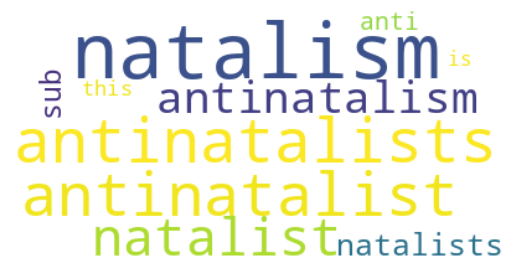

In [133]:
# Downvotes topics
create_wordcloud(tmp_model, 0)

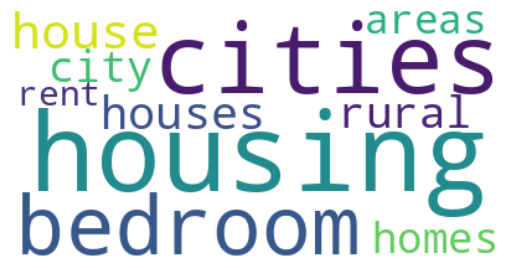

In [134]:
# Upvote Topics
create_wordcloud(tmp_model2, 0)